## POS tagging using modified Viterbi

### Data Preparation

In [59]:
import datetime
x = datetime.datetime.now()

In [60]:
#Importing libraries
import nltk
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from collections import Counter

In [61]:
nltk.download('treebank')
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\billa\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\billa\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [62]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [63]:
type(nltk_data[0])

list

In [64]:
print("The type of the nltk_data - ", type(nltk_data))
print("The type of the items in nltk_data - ", type(nltk_data[0]))
print("The length of the nltk_data -", len(nltk_data))

The type of the nltk_data -  <class 'list'>
The type of the items in nltk_data -  <class 'list'>
The length of the nltk_data - 3914


The ``` nltk_data ``` is a list of lists where each sentence from the tree bank is marked as a list in ```nltk_data```. Now, let's see how a sample sentence is tagged and stored in a list. The length of the ```nltk_data``` is 3914 meaning there are 3914 sentences. 

In [130]:
nltk_data[1]

[('Mr.', 'NOUN'),
 ('Vinken', 'NOUN'),
 ('is', 'VERB'),
 ('chairman', 'NOUN'),
 ('of', 'ADP'),
 ('Elsevier', 'NOUN'),
 ('N.V.', 'NOUN'),
 (',', '.'),
 ('the', 'DET'),
 ('Dutch', 'NOUN'),
 ('publishing', 'VERB'),
 ('group', 'NOUN'),
 ('.', '.')]

In [66]:
nltk_data[0][1][1]

'NOUN'

A sentence ```Pierre Vinken, 61 years old, will join the board as a nonexecutive director Nov 29.``` is tagged as seen above with the corresponding <b>POS</b> tags

Let's find the unique tags in ```nltk_data``` which should count to 12 as specified in the assignment problem statement.  

In [67]:
unique_tags = set([pair[1] for sentence in nltk_data for pair in sentence ])

In [68]:
print('The unique tags tagged to the corpus - ', unique_tags)
print('The length of the unique tags - ', len(unique_tags))

The unique tags tagged to the corpus -  {'PRT', 'ADP', 'CONJ', 'NOUN', 'ADV', '.', 'ADJ', 'DET', 'PRON', 'NUM', 'X', 'VERB'}
The length of the unique tags -  12


Split the Treebank dataset into train and validation sets. Please use a sample size of 95:5 for training: validation sets, i.e. keep the validation size small, else the algorithm will need a very high amount of runtime.

In [69]:
#ndom.seed(1234)
train, test = train_test_split(nltk_data,train_size = 0.95)

In [70]:
print('Train size -' , len(train))
print('Test size - ', len(test))

Train size - 3718
Test size -  196


In [71]:
train_tagged_words = [word for sent in train for word in sent]
len(train_tagged_words)

95642

In [72]:
train_tagged_words

[('At', 'ADP'),
 ('the', 'DET'),
 ('same', 'ADJ'),
 ('time', 'NOUN'),
 (',', '.'),
 ('though', 'ADV'),
 (',', '.'),
 ('he', 'PRON'),
 ('chastised', 'VERB'),
 ('the', 'DET'),
 ('media', 'NOUN'),
 ('for', 'ADP'),
 ('*', 'X'),
 ('paying', 'VERB'),
 ('such', 'ADJ'),
 ('close', 'ADJ'),
 ('attention', 'NOUN'),
 ('to', 'PRT'),
 ('Japanese', 'ADJ'),
 ('investment', 'NOUN'),
 ('when', 'ADV'),
 ('other', 'ADJ'),
 ('foreign', 'ADJ'),
 ('countries', 'NOUN'),
 (',', '.'),
 ('notably', 'ADV'),
 ('Britain', 'NOUN'),
 (',', '.'),
 ('are', 'VERB'),
 ('acquiring', 'VERB'),
 ('more', 'ADJ'),
 ('American', 'ADJ'),
 ('assets', 'NOUN'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ('Concurrent', 'ADJ'),
 ('with', 'ADP'),
 ('Mr.', 'NOUN'),
 ('Nichol', 'NOUN'),
 ("'s", 'PRT'),
 ('appointment', 'NOUN'),
 (',', '.'),
 ('Comprehensive', 'NOUN'),
 ('Care', 'NOUN'),
 ('moved', 'VERB'),
 ('its', 'PRON'),
 ('corporate', 'ADJ'),
 ('headquarters', 'NOUN'),
 ('from', 'ADP'),
 ('Irvine', 'NOUN'),
 (',', '.'),
 ('Calif.', 'NOUN'),
 ('

In [73]:
#derive lists of tokens and tags using train_tagged_words
tokens = [pair[0] for pair in train_tagged_words]
tags = [pair[1] for pair in train_tagged_words]

In [74]:
print('The set of unique words and tags in our training set -' )
print(len(set(tokens)))
print(len(set(tags)))

The set of unique words and tags in our training set -
12107
12


In [75]:
print(tokens[:100])

['At', 'the', 'same', 'time', ',', 'though', ',', 'he', 'chastised', 'the', 'media', 'for', '*', 'paying', 'such', 'close', 'attention', 'to', 'Japanese', 'investment', 'when', 'other', 'foreign', 'countries', ',', 'notably', 'Britain', ',', 'are', 'acquiring', 'more', 'American', 'assets', '*T*-1', '.', 'Concurrent', 'with', 'Mr.', 'Nichol', "'s", 'appointment', ',', 'Comprehensive', 'Care', 'moved', 'its', 'corporate', 'headquarters', 'from', 'Irvine', ',', 'Calif.', ',', 'to', 'St.', 'Louis', ',', 'where', 'the', 'company', 'maintained', 'its', 'contract', 'services', 'offices', '*T*-1', '.', 'Some', 'dealers', 'said', '0', 'the', 'Treasury', "'s", 'intent', 'is', '*', 'to', 'help', 'government', 'bond', 'dealers', 'gauge', 'investor', 'demand', 'for', 'the', 'securities', ',', '*', 'given', 'uncertainties', 'about', 'when', 'the', 'auction', 'will', 'occur', '*T*-1', '.']


In [76]:
print(set(tags))

{'PRT', 'CONJ', 'NOUN', 'ADV', '.', 'ADJ', 'NUM', 'DET', 'PRON', 'ADP', 'X', 'VERB'}


## 2. POS Tagging Algorithm - HMM

We'll use the HMM algorithm to tag the words. Given a sequence of words to be tagged, the task is to assign the most probable tag to the word. 

In other words, to every word w, assign the tag t that maximises the likelihood P(t/w). Since P(t/w) = P(w/t). P(t) / P(w), after ignoring P(w), we have to compute P(w/t) and P(t).


P(w/t) is basically the probability that given a tag (say NN), what is the probability of it being w (say 'building'). This can be computed by computing the fraction of all NNs which are equal to w, i.e. 

P(w/t) = count(w, t) / count(t). 


The term P(t) is the probability of tag t, and in a tagging task, we assume that a tag will depend only on the previous tag. In other words, the probability of a tag being NN will depend only on the previous tag t(n-1). So for e.g. if t(n-1) is a JJ, then t(n) is likely to be an NN since adjectives often precede a noun (blue coat, tall building etc.).


Given the penn treebank tagged dataset, we can compute the two terms P(w/t) and P(t) and store them in two large matrices. The matrix of P(w/t) will be sparse, since each word will not be seen with most tags ever, and those terms will thus be zero. 


### Emission Probabilities

In [77]:
# computing P(w/t) and storing in T x V matrix
words = set(tokens)
t = len(set(tags))
v = len(set(words))
w_given_t = np.zeros((t, v))

In [78]:
w_given_t.shape

(12, 12107)

**EMISSION PROBABILITIES**

In [79]:
#compute word given tag - Emission Probabilities
def word_given_tag(word,tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0] == word]
    count_w_given_tag = len(w_given_tag_list)
    return (count_w_given_tag,count_tag)

# count_w_given_tag is the count of the given word appearing as the given tag in the train_bag
# count_tag is the number of words appearing as the given tag in the train_bag

{'PRON', 'NOUN', 'ADJ', 'ADV', 'PRT', 'ADP', 'DET', 'VERB', 'NUM', '.', 'CONJ', 'X'}

In [80]:
# Let's print some words using different tags and look at the count
print(word_given_tag('The','PRON'))
print(word_given_tag('The','CONJ'))
print(word_given_tag('The','DET'))


(0, 2629)
(0, 2149)
(672, 8254)


In [81]:
print(word_given_tag('and','.'))
print(word_given_tag('and','NOUN'))
print(word_given_tag('and','CONJ'))


(0, 11141)
(2, 27436)
(1432, 2149)


In [82]:
print(word_given_tag('was','CONJ'))
print(word_given_tag('was','PRON'))
print(word_given_tag('was','VERB'))

(0, 2149)
(0, 2629)
(348, 12899)


***TRANSITIONAL PROBABILITES***

In [83]:
def t2_given_t1(t2,t1,tags,train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1=0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1]==t2:
            count_t2_t1 +=1
    return (count_t2_t1,count_t1)

In [84]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(set(tags)), len(set(tags))),dtype= 'float32')
for i, t1 in enumerate(list(set(tags))):
    for j, t2 in enumerate(list(set(tags))): 
        tags_matrix[i, j] = t2_given_t1(t2, t1,tags)[0]/t2_given_t1(t2, t1,tags)[1]

In [85]:
tags_matrix

array([[1.95822446e-03, 2.28459528e-03, 2.48368144e-01, 9.13838111e-03,
        4.17754576e-02, 8.42036530e-02, 5.61357699e-02, 1.02154046e-01,
        1.82767622e-02, 1.99086163e-02, 1.24020884e-02, 4.03394252e-01],
       [4.65332717e-03, 4.65332705e-04, 3.54118198e-01, 5.49092591e-02,
        3.39692868e-02, 1.14471845e-01, 4.23452780e-02, 1.17729180e-01,
        5.86319230e-02, 5.30479290e-02, 7.44532328e-03, 1.58213124e-01],
       [4.34830151e-02, 4.24624570e-02, 2.65344799e-01, 1.68027412e-02,
        2.40122467e-01, 1.21737858e-02, 9.47660021e-03, 1.31943431e-02,
        4.77474835e-03, 1.76410556e-01, 2.89765280e-02, 1.46777958e-01],
       [1.49303256e-02, 7.29927002e-03, 3.28467153e-02, 8.02919716e-02,
        1.35700062e-01, 1.27737224e-01, 3.25149298e-02, 6.86794966e-02,
        1.49303256e-02, 1.19442604e-01, 2.32249498e-02, 3.42402130e-01],
       [2.42348085e-03, 5.81635386e-02, 2.22780719e-01, 5.27780280e-02,
        9.46952701e-02, 4.35328968e-02, 7.97055885e-02, 1.72

In [86]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(set(tags)), index=list(set(tags)))

In [87]:
tags_df

,PRT,CONJ,NOUN,ADV,.,ADJ,NUM,DET,PRON,ADP,X,VERB
PRT,0.001958,0.002285,0.248368,0.009138,0.041775,0.084204,0.056136,0.102154,0.018277,0.019909,0.012402,0.403394
CONJ,0.004653,0.000465,0.354118,0.054909,0.033969,0.114472,0.042345,0.117729,0.058632,0.053048,0.007445,0.158213
NOUN,0.043483,0.042462,0.265345,0.016803,0.240122,0.012174,0.009477,0.013194,0.004775,0.176411,0.028977,0.146778
ADV,0.014930,0.007299,0.032847,0.080292,0.135700,0.127737,0.032515,0.068679,0.014930,0.119443,0.023225,0.342402
.,0.002423,0.058164,0.222781,0.052778,0.094695,0.043533,0.079706,0.172426,0.066601,0.090387,0.027556,0.088861
ADJ,0.011225,0.016507,0.699736,0.004952,0.064543,0.067019,0.020469,0.004622,0.000660,0.078409,0.020469,0.011390
NUM,0.026874,0.013735,0.357420,0.002687,0.117946,0.033741,0.182741,0.003583,0.001493,0.034637,0.208420,0.016721
DET,0.000242,0.000485,0.636419,0.012479,0.018173,0.206082,0.022413,0.005331,0.003756,0.009329,0.045796,0.039496
PRON,0.012933,0.005325,0.206542,0.034614,0.041080,0.072271,0.007227,0.009890,0.007988,0.023203,0.093952,0.484975
ADP,0.001496,0.000855,0.322505,0.013464,0.038897,0.106006,0.063155,0.324535,0.069139,0.017098,0.034516,0.008335


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

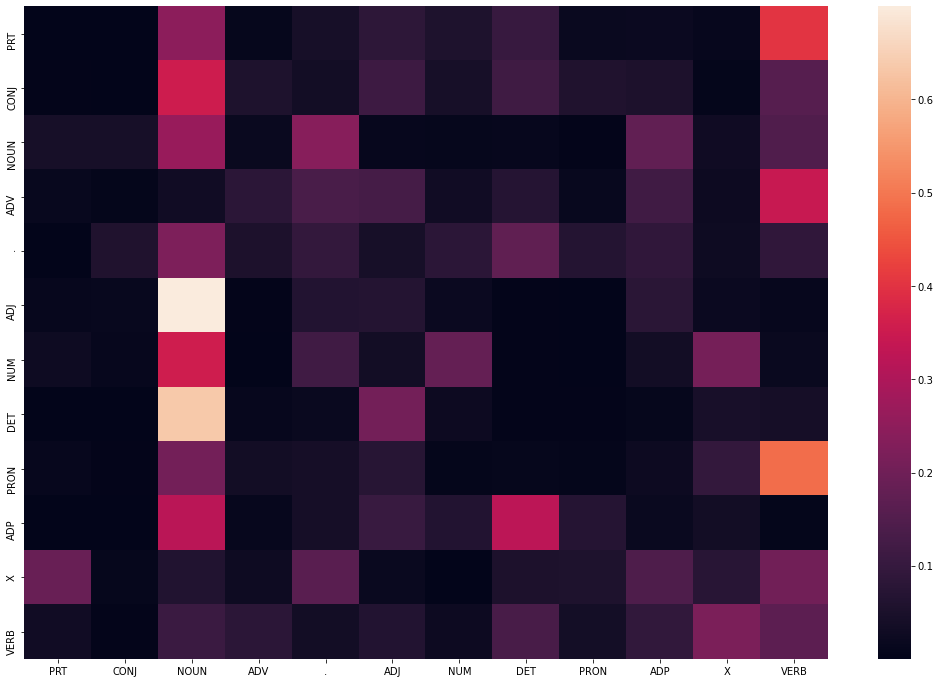

In [89]:
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

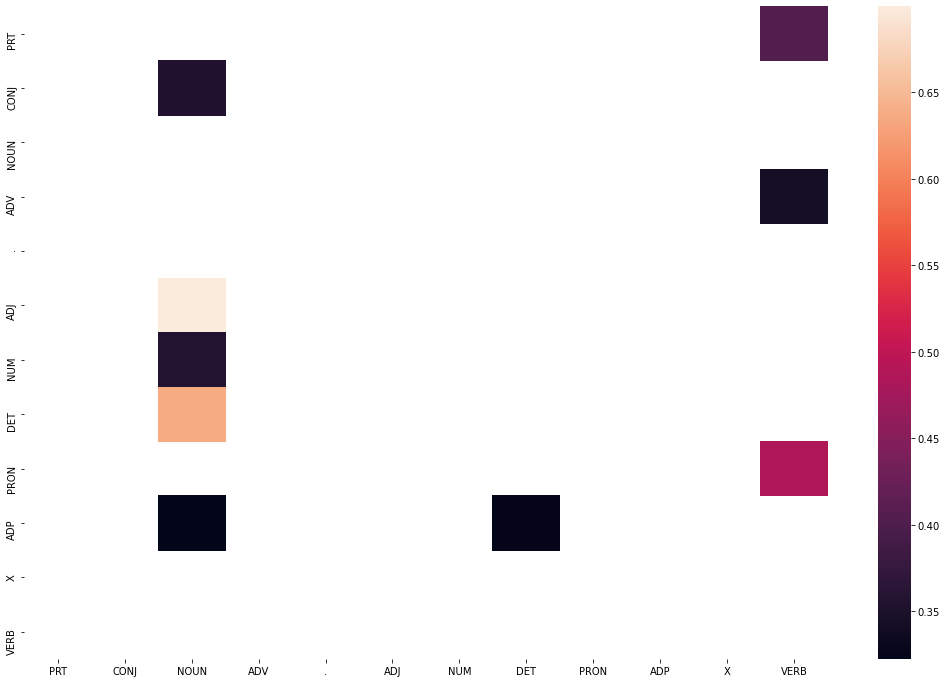

In [122]:
# frequent tags
# filter the df to get P(t2, t1) > 0.3
tags_frequent = tags_df[tags_df>0.3]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

### Build the vanilla Viterbi based POS tagger

## 3. Viterbi Algorithm

Let's now use the computed probabilities P(w, tag) and P(t2, t1) to assign tags to each word in the document. We'll run through each word w and compute P(tag/w)=P(w/tag).P(tag) for each tag in the tag set, and then assign the tag having the max P(tag/w).

We'll store the assigned tags in a list of tuples, similar to the list 'train_tagged_words'. Each tuple will be a (token, assigned_tag). As we progress further in the list, each tag to be assigned will use the tag of the previous token.

Note: P(tag|start) = P(tag|'.') 

In [91]:
T = set(tags)

In [92]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))



## 4. Evaluating on Test Set

In [93]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset

#random.seed(1234)

# choose random 5 sents
#rndom = [random.randint(1,len(test)) for x in range(5)]

# list of sents
test_run = [test[i] for i in range(len(test))]

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('Equitable', 'NOUN'),
  ('of', 'ADP'),
  ('Iowa', 'NOUN'),
  ('Cos.', 'NOUN'),
  (',', '.'),
  ('Des', 'NOUN'),
  ('Moines', 'NOUN'),
  (',', '.'),
  ('had', 'VERB'),
  ('been', 'VERB'),
  ('seeking', 'VERB'),
  ('a', 'DET'),
  ('buyer', 'NOUN'),
  ('for', 'ADP'),
  ('the', 'DET'),
  ('36-store', 'ADJ'),
  ('Younkers', 'NOUN'),
  ('chain', 'NOUN'),
  ('since', 'ADP'),
  ('June', 'NOUN'),
  (',', '.'),
  ('when', 'ADV'),
  ('it', 'PRON'),
  ('announced', 'VERB'),
  ('its', 'PRON'),
  ('intention', 'NOUN'),
  ('*', 'X'),
  ('to', 'PRT'),
  ('free', 'VERB'),
  ('up', 'PRT'),
  ('capital', 'NOUN'),
  ('*', 'X'),
  ('to', 'PRT'),
  ('expand', 'VERB'),
  ('its', 'PRON'),
  ('insurance', 'NOUN'),
  ('business', 'NOUN'),
  ('*T*-1', 'X'),
  ('.', '.')],
 [('Two', 'NUM'),
  ('leading', 'VERB'),
  ('constitutional-law', 'NOUN'),
  ('experts', 'NOUN'),
  ('said', 'VERB'),
  ('0', 'X'),
  ('President', 'NOUN'),
  ('Bush', 'NOUN'),
  ('does', 'VERB'),
  ("n't", 'ADV'),
  ('have', 'VERB'),
  ('th

In [94]:
# tagging the test sentences
start = time.time()
tagged_seq_d = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

In [95]:
print("Time taken in seconds: ", difference)
print(tagged_seq_d)
#print(test_run_base)

Time taken in seconds:  1679.645915031433
[('Equitable', 'NOUN'), ('of', 'ADP'), ('Iowa', 'NOUN'), ('Cos.', 'PRT'), (',', '.'), ('Des', 'NOUN'), ('Moines', 'NOUN'), (',', '.'), ('had', 'VERB'), ('been', 'VERB'), ('seeking', 'VERB'), ('a', 'DET'), ('buyer', 'NOUN'), ('for', 'ADP'), ('the', 'DET'), ('36-store', 'PRT'), ('Younkers', 'NOUN'), ('chain', 'NOUN'), ('since', 'ADP'), ('June', 'NOUN'), (',', '.'), ('when', 'ADV'), ('it', 'PRON'), ('announced', 'VERB'), ('its', 'PRON'), ('intention', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('free', 'ADJ'), ('up', 'PRT'), ('capital', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('expand', 'VERB'), ('its', 'PRON'), ('insurance', 'NOUN'), ('business', 'NOUN'), ('*T*-1', 'X'), ('.', '.'), ('Two', 'NUM'), ('leading', 'VERB'), ('constitutional-law', 'PRT'), ('experts', 'NOUN'), ('said', 'VERB'), ('0', 'X'), ('President', 'NOUN'), ('Bush', 'NOUN'), ('does', 'VERB'), ("n't", 'ADV'), ('have', 'VERB'), ('the', 'DET'), ('legal', 'ADJ'), ('authority', 'NOUN'), ('*', 'X')

In [96]:
# accuracy
check = [i for i, j in zip(tagged_seq_d, test_run_base) if i == j] 

In [97]:
accuracy_d = len(check)/len(tagged_seq_d)

In [98]:
accuracy_d

0.9117997616209773

In [99]:
incorrect_tagged_cases_d = [[test_run_base[i-1],j,i] for i, j in enumerate(zip(tagged_seq_d, test_run_base)) if j[0]!=j[1]]

In [100]:
incorrect_tagged_cases_d

[[('Iowa', 'NOUN'), (('Cos.', 'PRT'), ('Cos.', 'NOUN')), 3],
 [('the', 'DET'), (('36-store', 'PRT'), ('36-store', 'ADJ')), 15],
 [('to', 'PRT'), (('free', 'ADJ'), ('free', 'VERB')), 28],
 [('leading', 'VERB'),
  (('constitutional-law', 'PRT'), ('constitutional-law', 'NOUN')),
  41],
 [('adding', 'VERB'), (('more', 'ADV'), ('more', 'ADJ')), 93],
 [('which', 'DET'), (('*T*-194', 'PRT'), ('*T*-194', 'X')), 124],
 [('no', 'DET'), (('relation', 'PRT'), ('relation', 'NOUN')), 127],
 [('can', 'VERB'), (('generate', 'PRT'), ('generate', 'VERB')), 135],
 [('$', '.'), (('3.20', 'PRT'), ('3.20', 'NUM')), 144],
 [('$', '.'), (('377.60', 'PRT'), ('377.60', 'NUM')), 150],
 [('.', '.'), (('BRAMALEA', 'PRT'), ('BRAMALEA', 'NOUN')), 153],
 [('to', 'PRT'), (('issue', 'NOUN'), ('issue', 'VERB')), 161],
 [('US$', '.'), (('85.1', 'PRT'), ('85.1', 'NUM')), 168],
 [('of', 'ADP'), (('10.5', 'PRT'), ('10.5', 'NUM')), 173],
 [('for', 'ADP'), (('alleged', 'ADJ'), ('alleged', 'VERB')), 213],
 [('steel', 'NOUN'), 

In [101]:
#The number of incorrect_tagged words 
print('The number of incorrectly tagged words using Viterbi approach is -',len(incorrect_tagged_cases_d))

The number of incorrectly tagged words using Viterbi approach is - 444


In [102]:
#let's compute the actual tags and the actual previous tag in test set
actual_tags_d = [incorrect_tagged_cases_d[i][1][1][1] for i,item in enumerate(incorrect_tagged_cases_d)]
previous_tags_d = [incorrect_tagged_cases_d[i][0][1] for i,item in enumerate(incorrect_tagged_cases_d)]

In [103]:
print(Counter(actual_tags_d))
print(Counter(previous_tags_d))

Counter({'NOUN': 171, 'VERB': 90, 'ADJ': 81, 'NUM': 34, 'ADV': 27, 'DET': 14, 'X': 11, 'PRT': 9, 'ADP': 7})
Counter({'NOUN': 84, 'DET': 67, 'VERB': 62, '.': 60, 'ADJ': 34, 'ADP': 33, 'PRT': 28, 'X': 25, 'ADV': 18, 'PRON': 16, 'CONJ': 14, 'NUM': 3})


### Solve the problem of unknown words

Loooking at the above Counter values, most unknown tags belong to **NOUN** tag, i.e, 204 NOUN tags have been incorreclty assigned as **ADJ**. So, it makes sense to assign the **VERB** tag to those words whose **emission probabilities** is zero and are thereby increasing the overall accuracy of the model

In [104]:
# Viterbi Heuristic
def Viterbi_NOUN(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        if pmax == 0:state.append('NOUN')
        else:
            state_max = T[p.index(pmax)] 
            state.append(state_max)
    return list(zip(words, state))



In [105]:
# tagging the test sentences
start = time.time()
tagged_seq_N = Viterbi_NOUN(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)
print(tagged_seq_N)
#print(test_run_base)


Time taken in seconds:  1658.2501819133759
[('Equitable', 'NOUN'), ('of', 'ADP'), ('Iowa', 'NOUN'), ('Cos.', 'NOUN'), (',', '.'), ('Des', 'NOUN'), ('Moines', 'NOUN'), (',', '.'), ('had', 'VERB'), ('been', 'VERB'), ('seeking', 'VERB'), ('a', 'DET'), ('buyer', 'NOUN'), ('for', 'ADP'), ('the', 'DET'), ('36-store', 'NOUN'), ('Younkers', 'NOUN'), ('chain', 'NOUN'), ('since', 'ADP'), ('June', 'NOUN'), (',', '.'), ('when', 'ADV'), ('it', 'PRON'), ('announced', 'VERB'), ('its', 'PRON'), ('intention', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('free', 'ADJ'), ('up', 'PRT'), ('capital', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('expand', 'VERB'), ('its', 'PRON'), ('insurance', 'NOUN'), ('business', 'NOUN'), ('*T*-1', 'X'), ('.', '.'), ('Two', 'NUM'), ('leading', 'VERB'), ('constitutional-law', 'NOUN'), ('experts', 'NOUN'), ('said', 'VERB'), ('0', 'X'), ('President', 'NOUN'), ('Bush', 'NOUN'), ('does', 'VERB'), ("n't", 'ADV'), ('have', 'VERB'), ('the', 'DET'), ('legal', 'ADJ'), ('authority', 'NOUN'), ('*', 

In [106]:

# accuracy
check = [i for i, j in zip(tagged_seq_N, test_run_base) if i == j] 

accuracy_N = len(check)/len(tagged_seq_N)

print('Accuracy_NOUN =',accuracy_N)

incorrect_tagged_cases_N = [[test_run_base[i-1],j,i] for i, j in enumerate(zip(tagged_seq_N, test_run_base)) if j[0]!=j[1]]

incorrect_tagged_cases_N

#The number of incorrect_tagged words 
print('The number of incorrectly tagged words using Viterbi approach is -',len(incorrect_tagged_cases_N))

#let's compute the actual tags and the actual previous tag in test set
actual_tags_N = [incorrect_tagged_cases_N[i][1][1][1] for i,item in enumerate(incorrect_tagged_cases_N)]
previous_tags_N = [incorrect_tagged_cases_N[i][0][1] for i,item in enumerate(incorrect_tagged_cases_N)]

print(Counter(actual_tags_N))
print(Counter(previous_tags_N))

Accuracy_NOUN = 0.9394119984108065
The number of incorrectly tagged words using Viterbi approach is - 305
Counter({'VERB': 90, 'ADJ': 82, 'NOUN': 37, 'NUM': 34, 'ADV': 28, 'DET': 15, 'X': 11, 'ADP': 4, 'PRT': 4})
Counter({'VERB': 49, 'DET': 45, 'NOUN': 45, '.': 40, 'X': 25, 'PRT': 24, 'ADP': 20, 'ADV': 19, 'ADJ': 16, 'PRON': 11, 'CONJ': 9, 'NUM': 2})


### 3.3. Rule-Based (Regular Expression) Tagger

Now let's build a rule-based, or regular expression based tagger. In NLTK, the `RegexpTagger()` can be provided with handwritten regular expression patterns, as shown below.

In the example below, we specify regexes for gerunds and past tense verbs (as seen above), 3rd singular present verb (creates, moves, makes etc.), modal verbs MD (should, would, could), possesive nouns (partner's, bank's etc.), plural nouns (banks, institutions), cardinal numbers CD and finally, if none of the above rules are applicable to a word, we tag the most frequent tag NN.  

In [107]:
### 3.3. Rule-Based (Regular Expression) Tagger

#Now let's build a rule-based, or regular expression based tagger. In NLTK, the `RegexpTagger()` can be provided with handwritten regular expression patterns, as shown below.

#In the example below, we specify regexes for gerunds and past tense verbs (as seen above), 3rd singular present verb (creates, moves, makes etc.), modal verbs MD (should, would, could), possesive nouns (partner's, bank's etc.), plural nouns (banks, institutions), cardinal numbers CD and finally, if none of the above rules are applicable to a word, we tag the most frequent tag NN.  

# specify patterns for tagging
# example from the NLTK book
patterns = [
    (r'.*ing$', 'VERB'),              # gerund
    (r'.*ed$', 'VERB'),               # past tense
    (r'.*es$', 'VERB'),               # 3rd singular present
    (r'.*ould$', 'MD'),              # modals
    (r'.*\'s$', 'NOUN'),              # possessive nouns
    (r'.*s$', 'NOUN'),                # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
    (r'.*', 'NOUN')                    # nouns
]

regexp_tagger = nltk.RegexpTagger(patterns)
# help(regexp_tagger)

regexp_tagger.evaluate(test)

0.33094954310687325

As seen in the above rule based taggers, the accuracy was 32 percent. So, we can improve the accuracy by applying the rule based taggers if we apply the regexp_tagger if the emission probability is zero. 

In [108]:
# Viterbi Heuristic
def Viterbi_Rule_Based(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        if pmax == 0:state.append(regexp_tagger.tag([word])[0][1])
        else:
            state_max = T[p.index(pmax)] 
            state.append(state_max)
    return list(zip(words, state))



In [109]:
# tagging the test sentences
start = time.time()
tagged_seq_rb = Viterbi_Rule_Based(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)
print(tagged_seq_rb)
#print(test_run_base)


Time taken in seconds:  1653.1231203079224
[('Equitable', 'NOUN'), ('of', 'ADP'), ('Iowa', 'NOUN'), ('Cos.', 'NOUN'), (',', '.'), ('Des', 'NOUN'), ('Moines', 'NOUN'), (',', '.'), ('had', 'VERB'), ('been', 'VERB'), ('seeking', 'VERB'), ('a', 'DET'), ('buyer', 'NOUN'), ('for', 'ADP'), ('the', 'DET'), ('36-store', 'NOUN'), ('Younkers', 'NOUN'), ('chain', 'NOUN'), ('since', 'ADP'), ('June', 'NOUN'), (',', '.'), ('when', 'ADV'), ('it', 'PRON'), ('announced', 'VERB'), ('its', 'PRON'), ('intention', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('free', 'ADJ'), ('up', 'PRT'), ('capital', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('expand', 'VERB'), ('its', 'PRON'), ('insurance', 'NOUN'), ('business', 'NOUN'), ('*T*-1', 'X'), ('.', '.'), ('Two', 'NUM'), ('leading', 'VERB'), ('constitutional-law', 'NOUN'), ('experts', 'NOUN'), ('said', 'VERB'), ('0', 'X'), ('President', 'NOUN'), ('Bush', 'NOUN'), ('does', 'VERB'), ("n't", 'ADV'), ('have', 'VERB'), ('the', 'DET'), ('legal', 'ADJ'), ('authority', 'NOUN'), ('*', 

In [110]:

# accuracy
check = [i for i, j in zip(tagged_seq_rb, test_run_base) if i == j] 

accuracy_rb = len(check)/len(tagged_seq_rb)
print()
print()
print()
print('Accuracy-Rule Based =',accuracy_rb)

incorrect_tagged_cases_rb = [[test_run_base[i-1],j,i] for i, j in enumerate(zip(tagged_seq_rb, test_run_base)) if j[0]!=j[1]]
print()
print()
print()
incorrect_tagged_cases_rb

#The number of incorrect_tagged words 
print('The number of incorrectly tagged words using Viterbi approach is -',len(incorrect_tagged_cases_rb))

#let's compute the actual tags and the actual previous tag in test set
actual_tags_rb = [incorrect_tagged_cases_rb[i][1][1][1] for i,item in enumerate(incorrect_tagged_cases_rb)]
previous_tags_rb = [incorrect_tagged_cases_rb[i][0][1] for i,item in enumerate(incorrect_tagged_cases_rb)]

print()
print()
print()
print(Counter(actual_tags_rb))
print(Counter(previous_tags_rb))




Accuracy-Rule Based = 0.9513309495431068



The number of incorrectly tagged words using Viterbi approach is - 245



Counter({'ADJ': 82, 'VERB': 49, 'NOUN': 49, 'ADV': 28, 'DET': 15, 'X': 11, 'PRT': 5, 'ADP': 4, 'NUM': 2})
Counter({'DET': 43, 'NOUN': 40, 'VERB': 34, '.': 27, 'PRT': 19, 'ADP': 17, 'ADV': 16, 'ADJ': 15, 'X': 12, 'CONJ': 10, 'PRON': 9, 'NUM': 3})


we will modify the above viterbi algorithm such that the state probability is never zero and the first tag('NOUN' in our case) will not be defaulted. In other words, we will not multiply transition and emission probabilities to compute the state probability, we will directly assign either transition or emission probability to the state probability. 

In [111]:
# Viterbi Heuristic
def Viterbi_Nonzero_State(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        max_t_e=[]
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            #if word == 'is' : print(state_probability)
            #if emission_p == 0: state_probability = transition_p
            max_t_e.append(max(transition_p,emission_p))
            
            p.append(state_probability)
            #print(p)
            #print()  
        pmax = max(p)
        #if word =='awesome': 
          #print(max_t_e)
        # getting state for which probability is maximum
        if pmax == 0:state.append(T[max_t_e.index(max(max_t_e))])
        else:
            state_max = T[p.index(pmax)] 
            state.append(state_max)
    return list(zip(words, state))

In [112]:
# tagging the test sentences
start = time.time()
tagged_seq_nz_s = Viterbi_Nonzero_State(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)
print(tagged_seq_nz_s)
#print(test_run_base)

# accuracy
check = [i for i, j in zip(tagged_seq_nz_s, test_run_base) if i == j] 

accuracy_nz_s = len(check)/len(tagged_seq_nz_s)
print()
print()
print()
print('Accuracy_Nonzero_State =',accuracy_nz_s)

incorrect_tagged_cases_nz_s = [[test_run_base[i-1],j,i] for i, j in enumerate(zip(tagged_seq_nz_s, test_run_base)) if j[0]!=j[1]]
print()
print()
print()
incorrect_tagged_cases_nz_s

#The number of incorrect_tagged words 
print('The number of incorrectly tagged words using Viterbi approach is -',len(incorrect_tagged_cases_nz_s))

#let's compute the actual tags and the actual previous tag in test set
actual_tags_nz_s = [incorrect_tagged_cases_nz_s[i][1][1][1] for i,item in enumerate(incorrect_tagged_cases_nz_s)]
previous_tags_nz_s = [incorrect_tagged_cases_nz_s[i][0][1] for i,item in enumerate(incorrect_tagged_cases_nz_s)]

print()
print()
print()
print(Counter(actual_tags_nz_s))
print(Counter(previous_tags_nz_s))

Time taken in seconds:  1665.0003085136414
[('Equitable', 'NOUN'), ('of', 'ADP'), ('Iowa', 'NOUN'), ('Cos.', 'NOUN'), (',', '.'), ('Des', 'NOUN'), ('Moines', 'NOUN'), (',', '.'), ('had', 'VERB'), ('been', 'VERB'), ('seeking', 'VERB'), ('a', 'DET'), ('buyer', 'NOUN'), ('for', 'ADP'), ('the', 'DET'), ('36-store', 'NOUN'), ('Younkers', 'NOUN'), ('chain', 'NOUN'), ('since', 'ADP'), ('June', 'NOUN'), (',', '.'), ('when', 'ADV'), ('it', 'PRON'), ('announced', 'VERB'), ('its', 'PRON'), ('intention', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('free', 'ADJ'), ('up', 'PRT'), ('capital', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('expand', 'VERB'), ('its', 'PRON'), ('insurance', 'NOUN'), ('business', 'NOUN'), ('*T*-1', 'X'), ('.', '.'), ('Two', 'NUM'), ('leading', 'VERB'), ('constitutional-law', 'X'), ('experts', 'NOUN'), ('said', 'VERB'), ('0', 'X'), ('President', 'NOUN'), ('Bush', 'NOUN'), ('does', 'VERB'), ("n't", 'ADV'), ('have', 'VERB'), ('the', 'DET'), ('legal', 'ADJ'), ('authority', 'NOUN'), ('*', 'X'

### Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

In [113]:
print('The accuracy with the different approaches are -')
print('Default Vanilla Viterbi = ',accuracy_d*100)
print('Rule Based with Viterbi ', accuracy_rb*100)
print('Non Zero State Probabilities = ', accuracy_nz_s*100)
print('Defaulting Noun approach = ',accuracy_N*100) #assigning 

The accuracy with the different approaches are -
Default Vanilla Viterbi =  91.17997616209773
Rule Based with Viterbi  95.13309495431068
Non Zero State Probabilities =  93.80214541120382
Defaulting Noun approach =  93.94119984108065


### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

In [114]:
def corrected_tags(actual,default,modified):
    return  [j[0]  for i,j in enumerate(zip(actual,default,modified)) if (j[0][1] !=j[1][1] and j[0][1]==j[2][1])]

In [115]:
print('The corrected tags with rule based approach for unknown words -')
print(corrected_tags(test_run_base,tagged_seq_d,tagged_seq_rb))
print('Number of tags corrected is ',len(corrected_tags(test_run_base,tagged_seq_d,tagged_seq_rb)))
print()
print()
print('The corrected tags with non_zero_state approach for unknown words -')
print(corrected_tags(test_run_base,tagged_seq_d,tagged_seq_nz_s))
print('Number of tags corrected is ',len(corrected_tags(test_run_base,tagged_seq_d,tagged_seq_nz_s)))
print()
print()
print('The corrected tags with defaulting NOUN approach for unknown words -')
print(corrected_tags(test_run_base,tagged_seq_d,tagged_seq_N))
print('Number of tags corrected is ',len(corrected_tags(test_run_base,tagged_seq_d,tagged_seq_N)))
print()
print()

The corrected tags with rule based approach for unknown words -
[('Cos.', 'NOUN'), ('constitutional-law', 'NOUN'), ('relation', 'NOUN'), ('3.20', 'NUM'), ('377.60', 'NUM'), ('BRAMALEA', 'NOUN'), ('85.1', 'NUM'), ('10.5', 'NUM'), ('mill', 'NOUN'), ('pact', 'NOUN'), ('230-215', 'NUM'), ('bags', 'NOUN'), ('twinned', 'VERB'), ('5.7', 'NUM'), ('274', 'NUM'), ('manpower', 'NOUN'), ('removing', 'VERB'), ('safeguarding', 'VERB'), ('Anku', 'NOUN'), ('appropriated', 'VERB'), ('jurisdiction', 'NOUN'), ('EEOC', 'NOUN'), ('judgment', 'NOUN'), ('5.276', 'NUM'), ('36.9', 'NUM'), ('3.253', 'NUM'), ('personnel', 'NOUN'), ('discretion', 'NOUN'), ('23,000', 'NUM'), ('guide', 'NOUN'), ('sweater', 'NOUN'), ('2-8', 'NUM'), ('A.C.', 'NOUN'), ('Nielsen', 'NOUN'), ('out', 'PRT'), ('Greenwich', 'NOUN'), ('Village', 'NOUN'), ('Sixth', 'NOUN'), ('populated', 'VERB'), ('jugglers', 'NOUN'), ('magicians', 'NOUN'), ('hustlers', 'NOUN'), ('Advancing', 'VERB'), ('decliners', 'NOUN'), ('reviewed', 'VERB'), ('combination

List down at least three cases from the sample test file (i.e. unknown word-tag pairs) which were incorrectly tagged by the original Viterbi POS tagger and got corrected after your modifications.


In [143]:
sample = open('Test_sentences.txt','r')
sample_words=list(sample.read().split())

In [144]:
len(sample_words)

168

Let's call **Viterbi** **(the original POS tagger)** for the sample words, followed by **Viterbi_Rule_Based** and compare the accuracies

In [145]:
print(Viterbi(sample_words))

[('Android', 'PRT'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google.', 'PRT'), ('Android', 'PRT'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'PRT'), ('worldwide', 'PRT'), ('on', 'ADP'), ('smartphones', 'PRT'), ('since', 'ADP'), ('2011', 'PRT'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013.', 'PRT'), ('Google', 'PRT'), ('and', 'CONJ'), ('Twitter', 'PRT'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'PRT'), ('that', 'DET'), ('gave', 'VERB'), ('Google', 'PRT'), ('access', 'NOUN'), ('to', 'PRT'), ("Twitter's", 'PRT'), ('firehose.', 'PRT'), ('Twitter', 'PRT'), ('is', 'VERB'), ('an', 'DET'), ('online', 'PRT'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), ('which', 'DET'), ('users', 'NOUN'), ('post', 'NOUN'), ('and', 'CONJ'), ('inte

In [147]:
print(Viterbi_Rule_Based(sample_words))

[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google.', 'NOUN'), ('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'VERB'), ('since', 'ADP'), ('2011', 'NUM'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013.', 'NOUN'), ('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NUM'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'NOUN'), ('access', 'NOUN'), ('to', 'PRT'), ("Twitter's", 'NOUN'), ('firehose.', 'NOUN'), ('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'NOUN'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), ('which', 'DET'), ('users', 'NOUN'), ('post', 'NOUN'), ('and', '

In [148]:
#Let's print the difference in tags with Viterbi and Viterbi_Rule_Based
print([j for j in zip(Viterbi_Rule_Based(sample_words),Viterbi(sample_words)) if j[0]!=j[1]])

[(('Android', 'NOUN'), ('Android', 'PRT')), (('Google.', 'NOUN'), ('Google.', 'PRT')), (('Android', 'NOUN'), ('Android', 'PRT')), (('OS', 'NOUN'), ('OS', 'PRT')), (('worldwide', 'NOUN'), ('worldwide', 'PRT')), (('smartphones', 'VERB'), ('smartphones', 'PRT')), (('2011', 'NUM'), ('2011', 'PRT')), (('2013.', 'NOUN'), ('2013.', 'PRT')), (('Google', 'NOUN'), ('Google', 'PRT')), (('Twitter', 'NOUN'), ('Twitter', 'PRT')), (('2015', 'NUM'), ('2015', 'PRT')), (('that', 'ADP'), ('that', 'DET')), (('Google', 'NOUN'), ('Google', 'PRT')), (("Twitter's", 'NOUN'), ("Twitter's", 'PRT')), (('firehose.', 'NOUN'), ('firehose.', 'PRT')), (('Twitter', 'NOUN'), ('Twitter', 'PRT')), (('online', 'NOUN'), ('online', 'PRT')), (('interact', 'NOUN'), ('interact', 'PRT')), (('messages', 'VERB'), ('messages', 'PRT')), (('tweets.', 'NOUN'), ('tweets.', 'PRT')), (('politics,', 'NOUN'), ('politics,', 'PRT')), (('domineering', 'VERB'), ('domineering', 'PRT')), (('personality.', 'NOUN'), ('personality.', 'PRT')), (('20

Listing down a few words that were incorrectly tagged by the **original Viterbi** and were later correctly tagged with **Viterbi_Rule_Based** <br/><br/>

| Word | Orignal_Viterbi | Viterbi_Rule_Based(modified) |
| --- | --- | --- |
| Android | PRT | NOUN |
| Google | PRT | NOUN |
| invited | PRT | VERB |
| OS | PRT | NOUN |
| 2011 | PRT | NOUN |
| Twitter | PRT | NOUN |
| Cup | PRT | NOUN |
| FIFA | PRT | NOUN |



In [116]:
import datetime
y= datetime.datetime.now()
print(y-x)

1:51:27.068720
